<a href="https://colab.research.google.com/github/Harshu1707/Data-Cleaning-Preprocessing-AIML/blob/main/Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your dataset in CSV format


Saving Mall_Customers.csv to Mall_Customers (1).csv

 Dataset Loaded Successfully!
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Shape: (200, 5)


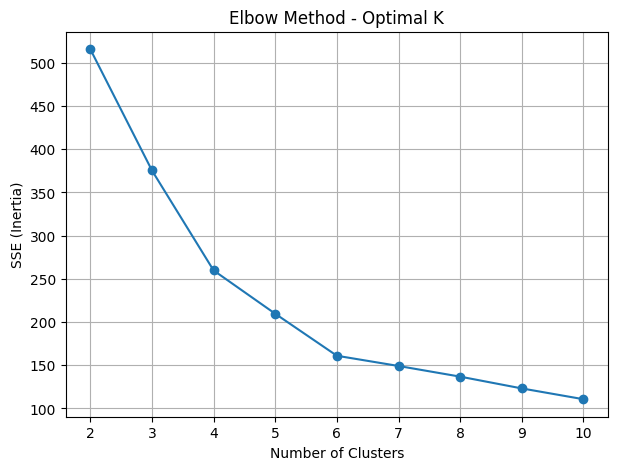

Select K by checking the elbow point on the plot above!
Enter number of clusters (K): 7

 Cluster Labels Assigned!
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


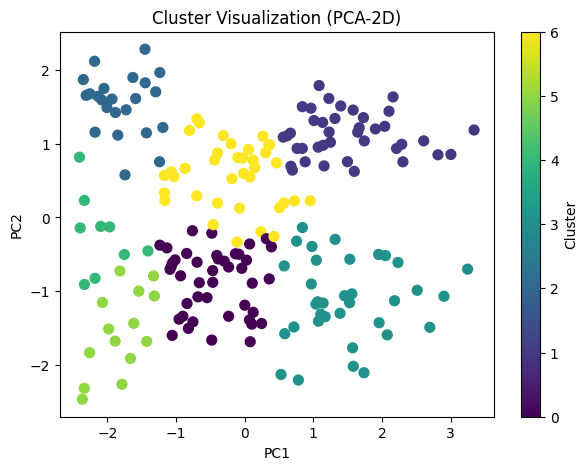


 Silhouette Score: 0.4276
(Higher score = Better clustering)


In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from google.colab import files

print("Please upload your dataset in CSV format")
uploaded = files.upload()

file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

print("\n Dataset Loaded Successfully!")
print(df.head())
print("\nShape:", df.shape)


data = df.select_dtypes(include=[np.number])
data.dropna(inplace=True)


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


sse = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K_range, sse, marker='o')
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.grid(True)
plt.show()

print("Select K by checking the elbow point on the plot above!")


K = int(input("Enter number of clusters (K): "))

kmeans = KMeans(n_clusters=K, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

df['Cluster'] = cluster_labels
print("\n Cluster Labels Assigned!")
print(df.head())


pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(7,5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, s=50)
plt.title("Cluster Visualization (PCA-2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()


score = silhouette_score(scaled_data, cluster_labels)
print(f"\n Silhouette Score: {score:.4f}")
print("(Higher score = Better clustering)")
